<a href="https://colab.research.google.com/github/FREDY129053/SkillBox_ML/blob/main/5_5_ML_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1

Подключите необходимые библиотеки.

In [1]:
### Ваш код здесь ###
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [2]:
### Ваш код здесь ###
df = pd.read_csv('/content/data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [3]:
### Ваш код здесь ###
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [10]:
import numpy as np
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['LotArea',
 'LotArea_M',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'TotalBsmtSF_M',
 'GrLivArea',
 'GrLivArea_M',
 'Bath',
 'GarageArea',
 'GarageArea_M',
 'SalePrice']

In [12]:
### Ваш код здесь ###
data_cor = pd.DataFrame(df, columns=num_cols)
corr = data_cor.corr()
corr.style.background_gradient(cmap='coolwarm')

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [14]:
df_without_lin_params = df.drop(['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], axis=1)  # Удаляем линейно зависимые данные

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

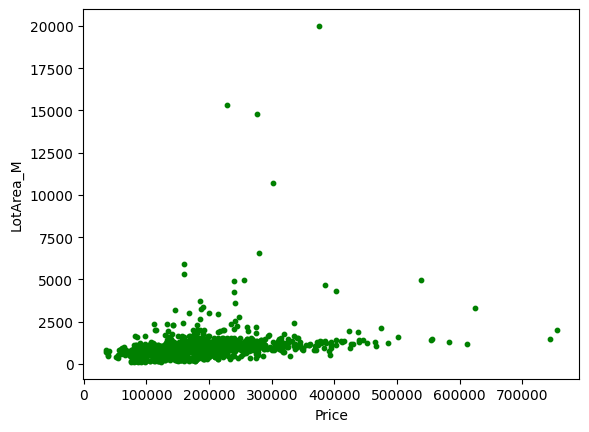

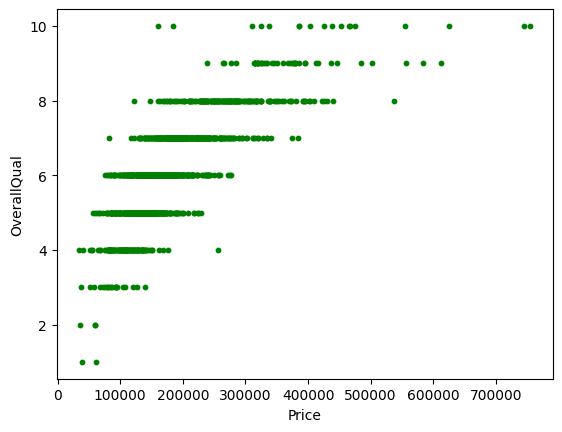

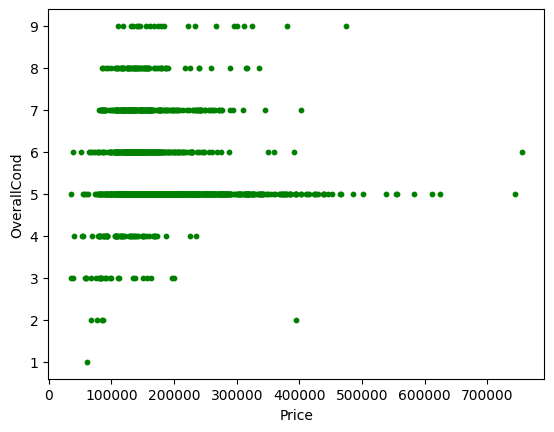

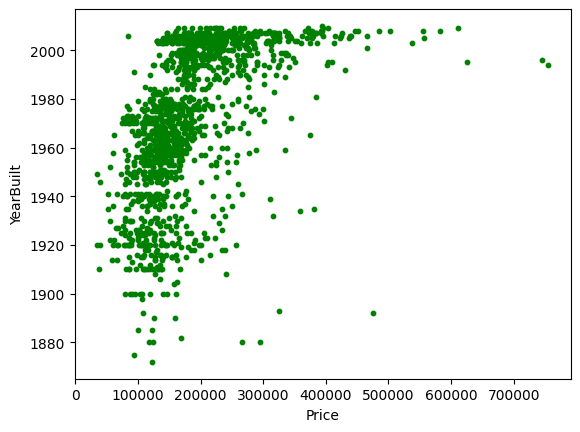

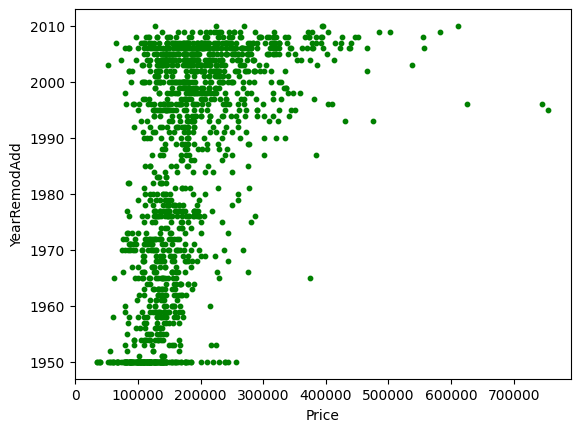

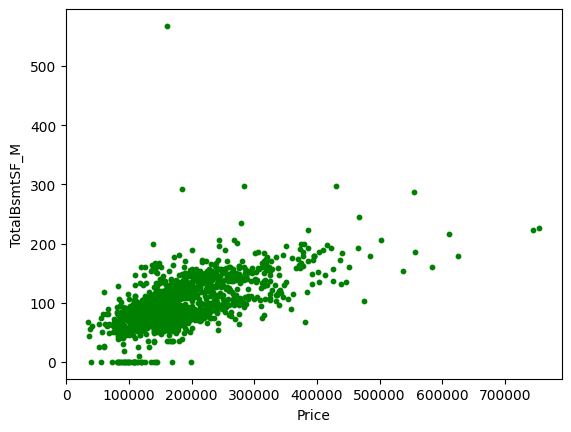

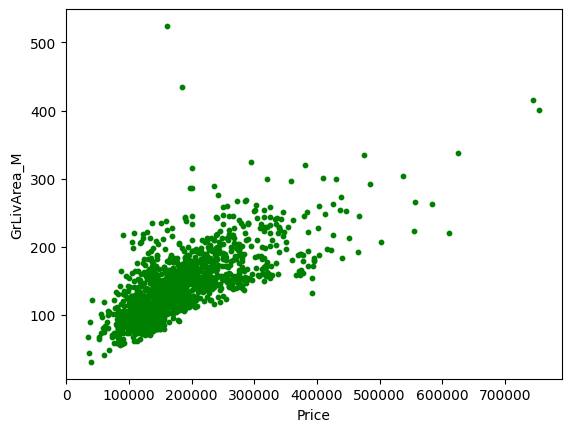

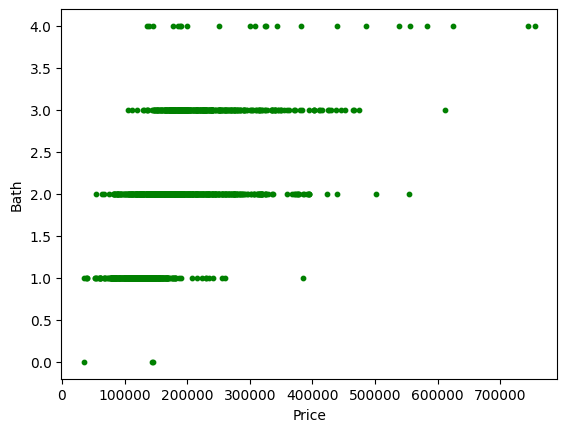

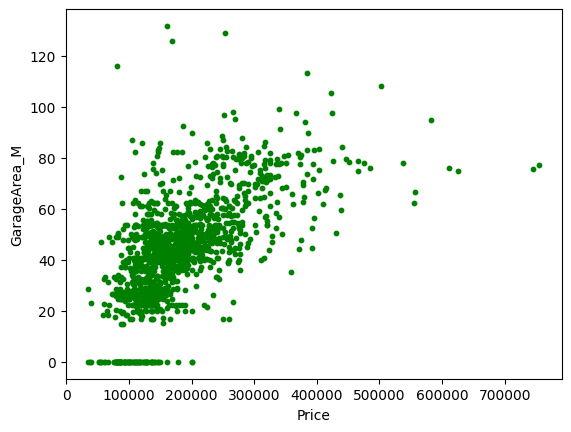

In [19]:
### Ваш код здесь ###
columns = df_without_lin_params.select_dtypes(include=np.number).columns.tolist()[:-1]
for i in columns:
  plt.scatter(df['SalePrice'], df[i], s=10, c='g')
  plt.xlabel('Price')
  plt.ylabel(i)
  plt.show()

4. Сделайте предварительные выводы.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [45]:
### Ваш код здесь ###
from sklearn.preprocessing import OneHotEncoder
categorical_features = [i for i in df.columns.tolist() if i not in num_cols]
num_cols2 = [i for i in df_without_lin_params.columns.tolist() if i in num_cols]

onehotencoder = OneHotEncoder(sparse_output = False)
encoded_df = pd.DataFrame(onehotencoder.fit_transform(df_without_lin_params[categorical_features]))
result_df = df_without_lin_params.join(encoded_df)
for i in categorical_features:
  result_df.drop(i, axis=1, inplace=True)
result_df.drop('SalePrice', axis=1, inplace=True)
result_df.shape

(1460, 115)

## Задание 4

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [49]:
### Ваш код здесь ###
train, test = train_test_split(result_df, test_size=0.3, random_state=42)
result_df = df_without_lin_params.join(encoded_df)
train_sale, test_sale = train_test_split(result_df, test_size=0.3, random_state=42)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [ ]:
### Ваш код здесь ###
# Выше реализовано в result_df

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [50]:
### Ваш код здесь ###
from sklearn import preprocessing
train = preprocessing.normalize(train, axis=0)
test = preprocessing.normalize(test, axis=0)

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [51]:
### Ваш код здесь ###
model = LinearRegression(fit_intercept=True)
model.fit(train, train_sale['SalePrice'])
print(f'w0 = {model.intercept_}')
for i in range(len(model.coef_)):
  print(f'w{i+1} = {model.coef_[i]}')

w0 = 1.0696285685890097e+19
w1 = 292319.98915539245
w2 = 3139134.652469684
w3 = 963479.947534217
w4 = 24476845.872204117
w5 = 2281602.8106449135
w6 = 473675.984956042
w7 = 2249223.7409458696
w8 = 69100.2022776822
w9 = 560302.0562253401
w10 = -6.243387431073729e+18
w11 = -9.960111015138102e+19
w12 = -5.562567452599668e+18
w13 = -9.330531762566305e+17
w14 = -1.142752092356008e+18
w15 = -1.0256513918392191e+18
w16 = -1.7035142399587172e+18
w17 = -6.033651023297231e+18
w18 = -5.1067777067431715e+19
w19 = -5.457642698242111e+18
w20 = -2.623708078889793e+19
w21 = -3.6384284654947277e+18
w22 = -2.57275744081347e+18
w23 = -8.397649824692103e+18
w24 = -4.4887326425857705e+18
w25 = -2.6173584107739476e+19
w26 = -3.582559854241653e+19
w27 = 5.592792532557761e+17
w28 = 1.8549194360794954e+18
w29 = 3.974425845034354e+18
w30 = 3.954701525541094e+17
w31 = 1.1837710540421208e+19
w32 = -9.244958280899906e+18
w33 = -1.904263581892274e+19
w34 = -1.945220172446209e+19
w35 = -3.8647605900309996e+18
w36 = -

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [53]:
### Ваш код здесь ###
lasso_regression = Lasso(alpha=0.1)
lasso_regression.fit(train, train_sale['SalePrice'])

print('Train score:', lasso_regression.score(train, train_sale['SalePrice']))
print('Test score', lasso_regression.score(test, test_sale['SalePrice']))

coef = []
for i in range(-3, 5):
  alpha = 10**i
  lasso_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
  lasso_regression.fit(train, train_sale['SalePrice'])

  coef.append(list(lasso_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(lasso_regression.score(train, train_sale['SalePrice']))
  print(lasso_regression.score(test, test_sale['SalePrice']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Train score: 0.8113795652234317
Test score -33.80934722891439


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.001 -----
0.8114380851335724
-42.13511354442346


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.194e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.01 -----
0.8114374997421597
-41.66769929172718


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.1 -----
0.8113795652234317
-33.80934722891439
----- lambda = 1 -----
0.807591380435005
-2.141384055247162
----- lambda = 10 -----
0.8044249465792371
-1.0842553362211218
----- lambda = 100 -----
0.7375751387551668
0.19707606754842355
----- lambda = 1000 -----
0.06990702788323411
0.09634003993767659
----- lambda = 10000 -----
0.0
-0.0002440491368771447


Посмотрите на веса полученной модели. Какой вывод можно сделать?

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [54]:
### Ваш код здесь ###
### Ваш код здесь ###
ridge_regression = Ridge(alpha=0.1)
ridge_regression.fit(train, train_sale['SalePrice'])

print('Train score:', ridge_regression.score(train, train_sale['SalePrice']))
print('Test score', ridge_regression.score(test, test_sale['SalePrice']))

coef = []
for i in range(-3, 5):
  alpha = 10**i
  ridge_regression = Lasso(alpha=alpha) # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(train, train_sale['SalePrice'])

  coef.append(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(train, train_sale['SalePrice']))
  print(ridge_regression.score(test, test_sale['SalePrice']))

Train score: 0.7701680728627198
Test score 0.1388424274203165


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.194e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.001 -----
0.8114380851335724
-42.13511354442346
----- lambda = 0.01 -----
0.8114374997421597
-41.66769929172718


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.338e+10, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


----- lambda = 0.1 -----
0.8113795652234317
-33.80934722891439
----- lambda = 1 -----
0.807591380435005
-2.141384055247162
----- lambda = 10 -----
0.8044249465792371
-1.0842553362211218
----- lambda = 100 -----
0.7375751387551668
0.19707606754842355
----- lambda = 1000 -----
0.06990702788323411
0.09634003993767659
----- lambda = 10000 -----
0.0
-0.0002440491368771447


Посмотрите на веса полученной модели. Какой вывод можно сделать?

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации.